Name : Dilshan J.V.A.P

Index number : 190144D

Exercise 9

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

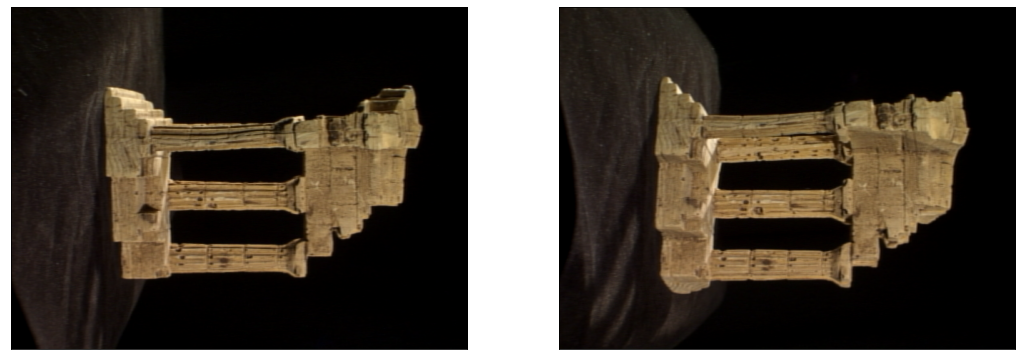

In [13]:
f = open(r'templeSparseRing/templeSR_par.txt', 'r')
assert f is not None
n= int(f.readline())
l=f.readline().split()
im1_fn=l[0]
k1=np.array([float(i) for i in l[1:10]]).reshape((3,3))
R1=np.array([float(i) for i in l[10:19]]).reshape((3,3))
t1=np.array([float(i) for i in l[19:22]]).reshape((3,1))
l=f.readline().split()
im2_fn=l[0]
k2=np.array([float(i) for i in l[1:10]]).reshape((3,3))
R2=np.array([float(i) for i in l[10:19]]).reshape((3,3))
t2=np.array([float(i) for i in l[19:22]]).reshape((3,1))
im1= cv.imread(r'templeSparseRing/' + im1_fn,cv.IMREAD_COLOR)
im2= cv.imread(r'templeSparseRing/' + im2_fn,cv.IMREAD_COLOR)
assert im1 is not None
assert im2 is not None
fig, ax = plt.subplots( 1, 2, figsize = (18, 8))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
for i in range(2):
    ax [i] . set_xticks ([]) , ax [i] . set_yticks ([])
plt.show()

In [18]:
sift = cv.xfeatures2d.SIFT_create()
kp1, decs1 = sift.detectAndCompute(im1, None)
kp2, decs2 = sift.detectAndCompute(im2, None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm =FLANN_INDEX_KDTREE, trees = 5 )
search_params = dict(checks=100)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(decs1, decs2, k=2)
good = []
pts1 = []
pts2 = []
for i, (m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        good.append(m)
    pts1.append(kp1[m.queryIdx].pt)
    pts2.append(kp2[m.trainIdx].pt)
pts1 = np.array(pts1)
pts2 = np.array(pts2)
F,mask = cv.findFundamentalMat(pts1, pts2, cv.FM_RANSAC)
print ("F:\n",F)
E = k2.T @ F @ k1
print ("E:\n",E)
retval, R, t, mask = cv.recoverPose(E, pts1, pts2, k1)
R_t_1 = np.concatenate((R1, t1), axis =1) # 3 x 4
R2_ = R1 @ R
t2_ = R1 @ t
R_t_2 = np.concatenate((R2_, t2_), axis =1)
P1 = k1 @ np.hstack((R1, t1))
P2_ = k2 @ R_t_2

F:
 [[ 2.01896041e-06  5.52692772e-06 -2.19295389e-02]
 [-2.56747682e-07  1.76070577e-07 -5.62348385e-04]
 [ 1.90193823e-02 -2.37931431e-03  1.00000000e+00]]
E:
 [[ 4.66706150e+00  1.28223527e+01 -3.03391777e+01]
 [-5.95649067e-01  4.09957593e-01 -9.10202097e-01]
 [ 2.97487106e+01 -1.01464259e+00 -1.74152871e-02]]


In [15]:
sift = cv.xfeatures2d.SIFT_create()
kp1, decs1 = sift.detectAndCompute(im1, None)
kp2, decs2 = sift.detectAndCompute(im2, None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm =FLANN_INDEX_KDTREE, trees = 5 )
search_params = dict(checks=100)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(decs1, decs2, k=2)
good = []
pts1 = []
pts2 = []
for i, (m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        good.append(m)
    pts1.append(kp1[m.queryIdx].pt)
    pts2.append(kp2[m.trainIdx].pt)
pts1 = np.array(pts1)
pts2 = np.array(pts2)
F,mask = cv.findFundamentalMat(pts1, pts2, cv.FM_RANSAC)
print ("F:\n",F)
E = k2.T @ F @ k1
print ("E:\n",E)
retval, R, t, mask = cv.recoverPose(E, pts1, pts2, k1)
R_t_1 = np.concatenate((R1, t1), axis =1) # 3 x 4
R2_ = R1 @ R
t2_ = R1 @ t
R_t_2 = np.concatenate((R2_, t2_), axis =1)
P1 = k1 @ np.hstack((R1, t1))
P2_ = k2 @ R_t_2

F:
 [[ 2.01896041e-06  5.52692772e-06 -2.19295389e-02]
 [-2.56747682e-07  1.76070577e-07 -5.62348385e-04]
 [ 1.90193823e-02 -2.37931431e-03  1.00000000e+00]]
E:
 [[ 4.66706150e+00  1.28223527e+01 -3.03391777e+01]
 [-5.95649067e-01  4.09957593e-01 -9.10202097e-01]
 [ 2.97487106e+01 -1.01464259e+00 -1.74152871e-02]]


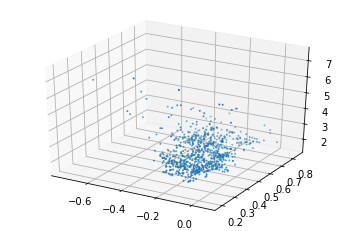

In [16]:
points4d = cv.triangulatePoints(P1, P2_, pts1.T, pts2.T)
points4d /= points4d[3, :]
import matplotlib.pyplot as plt
X = points4d[0, :]
Y = points4d[1, :]
Z = points4d[2, :]
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, s=1, cmap='gray')
plt.show()